# Solución de la ecuación de advección en una dimensión

Se presenta la solución de la ecuación de onda usando el método de diferencias finitas.


## Problema


Se quiere resolver la ecuación

$$\frac{\partial u(x, t)}{\partial t}  + v \frac{\partial u(x, t)}{\partial x} = 0\, ,$$

para $x\in [0, L]$, con

\begin{align}
&u(x, 0) = I(x)\\
&u(0, t) = U_0\, .
\end{align}

## Esquema de solución

Para resolver el problema usamos un método de diferencias finitas centradas en el espacio
y diferencias finitas hacia adelante en el tiempo. Por tanto, tenemos la siguiente
ecuación para la solución en el nodo $i$ en el instante $n+1$

$$u_i^{n+1} = u_i^{n}  + \frac{1}{2}C(u_{i + 1}^n - u_{i - 1}^n)\, ,$$

donde $C = v\Delta t/\Delta x$, es el número de Courant.

In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [3]:
largo = 1.0 # m
vel = 1.0 # m/s
npts = 100
niter = 500
x = np.linspace(0, largo, npts)
C = 0.1
dx = x[1] - x[0]
dt = C*dx/vel

In [4]:
sol = np.zeros((niter, npts))
sol[0, :] = np.exp(-1000*(x - largo/4)**2)
sol[0, 0] = 0 # Condición de frontera

In [5]:
for cont in range(1, niter):
    sol[cont, 2:-1] = sol[cont - 1, 2:-1]\
                    - 0.5*C*(sol[cont - 1,3:] - sol[cont - 1, 1:-2])

In [6]:
# Actualizar animacion
def update(data, line):
    line.set_ydata(data)
    return line,

<IPython.core.display.Javascript object>


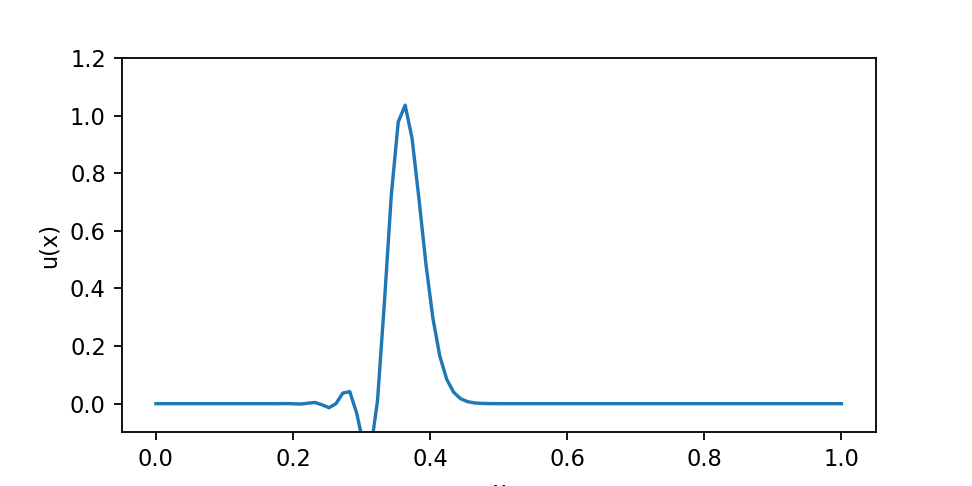

In [7]:
# Animacion
fig0, ax0 = plt.subplots(figsize=(6, 3))
line0, = ax0.plot(x, sol[0, :])
ani = animation.FuncAnimation(fig0, update, sol, interval=niter,
                              repeat=True, fargs=(line0,))
plt.xlabel('x')
plt.ylabel('u(x)')
plt.ylim(-0.1, 1.2)
plt.show()


Este esquema es inestable, independiente del número Courant
que tomemos. Si hacemos el número más pequeño lo que pasará
es que se tardá más tiempo en "explotar". ¿Qué esquema
sería estable para esta ecuación?

**Pruebe a cambiar el número de Courant y repetir la simulación**.
